In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Predicting_transportation_choice.csv')
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [3]:
print('number of rows:',df.shape[0])
print('number of columns:',df.shape[1])

number of rows: 444
number of columns: 9


In [4]:
df.dtypes

Age            int64
Gender        object
Engineer       int64
MBA            int64
Work Exp       int64
Salary       float64
Distance     float64
license        int64
Transport     object
dtype: object

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          444 non-null    float64
 1   Work Exp     444 non-null    float64
 2   Salary       444 non-null    float64
 3   Distance     444 non-null    float64
 4   Transport    444 non-null    int8   
 5   Gender_Male  444 non-null    uint8  
 6   Engineer_1   444 non-null    uint8  
 7   MBA_1        444 non-null    uint8  
 8   license_1    444 non-null    uint8  
dtypes: float64(4), int8(1), uint8(4)
memory usage: 16.2 KB


In [5]:
df.duplicated().sum()

0

In [6]:
cat = ['Gender','Engineer','MBA','license','Transport']
for col in cat:
  df[col]=df[col].astype('object')

In [7]:
table=pd.pivot_table(df,index=['Transport','Gender'],aggfunc={'Age':np.mean,'Distance':np.mean,'Salary':np.mean,'Work Exp':np.mean,'license':np.count_nonzero,'MBA':np.count_nonzero,'Engineer':np.count_nonzero})
table

Age   Distance  Engineer  MBA     Salary  \
Transport         Gender                                                   
Private Transport Female  27.411765  12.884314        41    9  16.656863   
                  Male    30.946237  13.719355        71   20  25.887097   
Public Transport  Female  26.831169   9.779221        54   15  13.336364   
                  Male    26.807175  10.500000       169   68  13.121525   

                           Work Exp  license  
Transport         Gender                      
Private Transport Female   6.372549       10  
                  Male    10.397849       61  
Public Transport  Female   5.103896        0  
                  Male     4.986547       33

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work Exp'}>],
       [<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Distance'}>]], dtype=object)

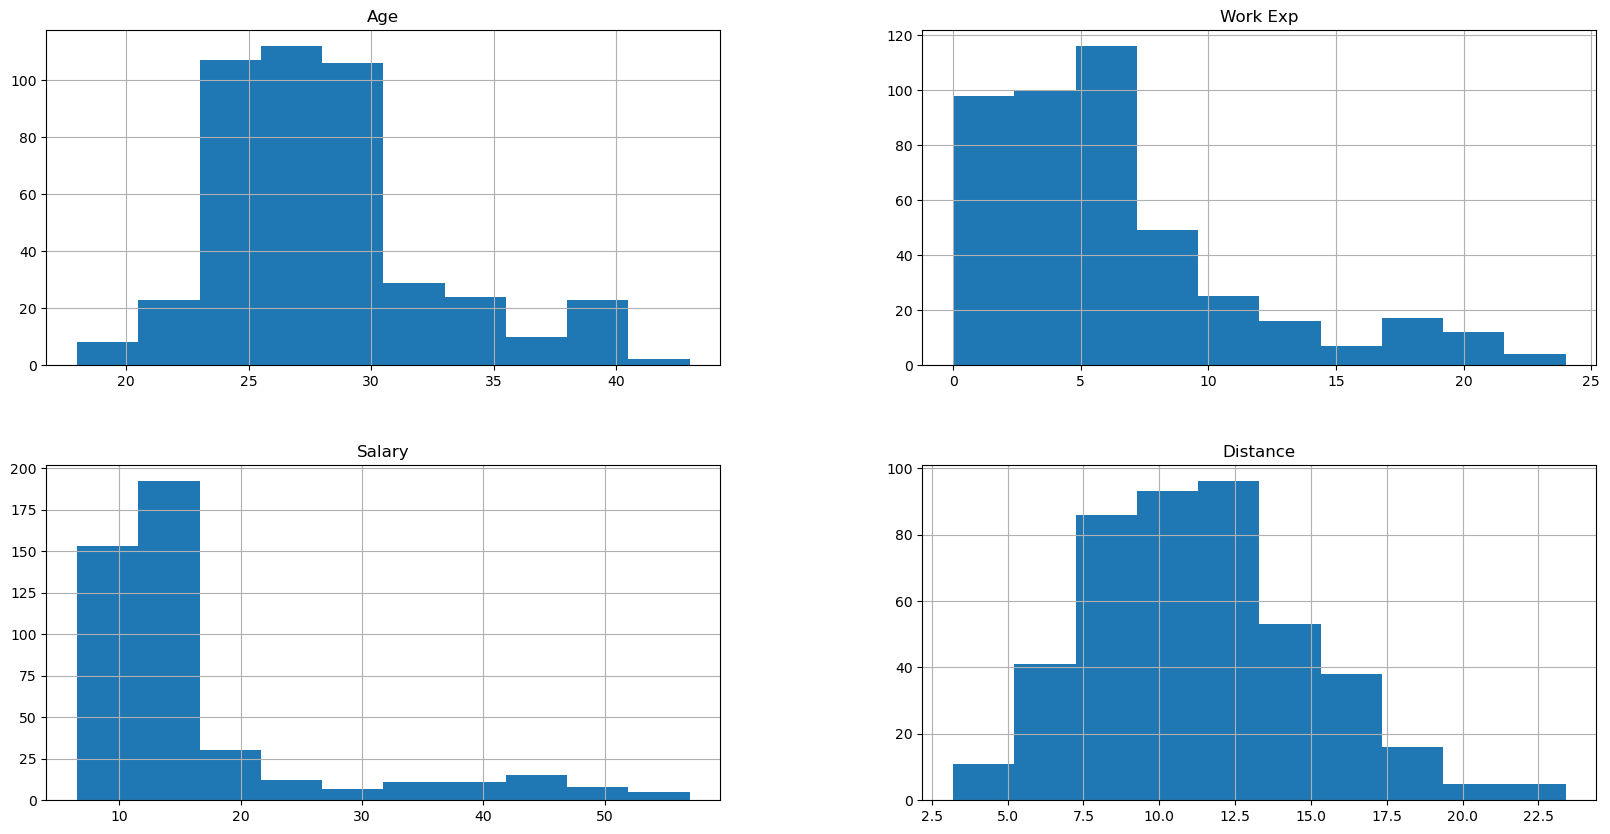

In [9]:
df.hist(figsize=(20,10))

<AxesSubplot:>

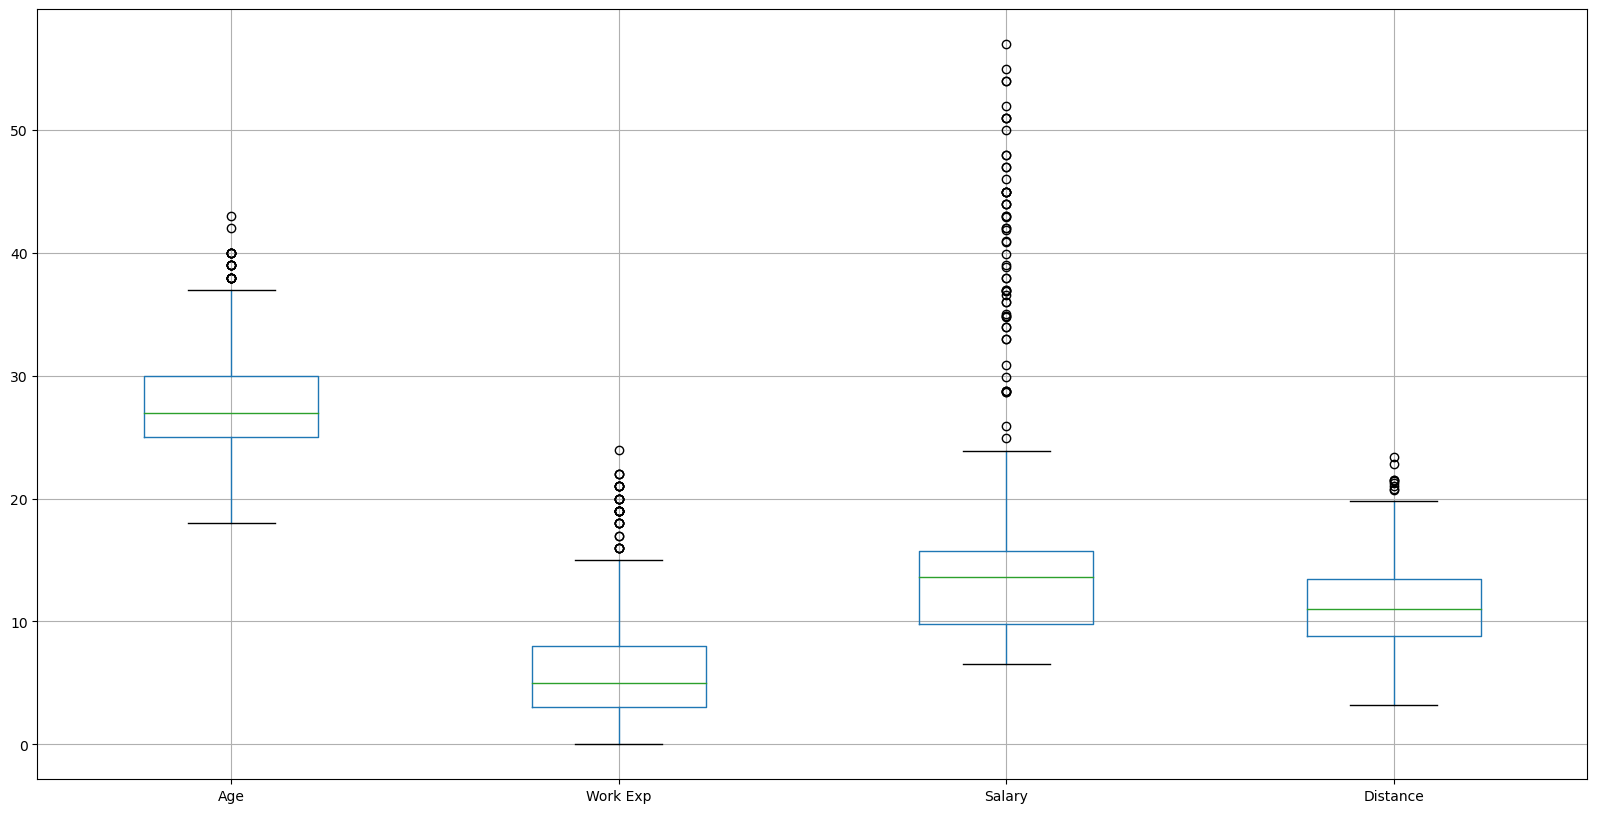

In [10]:
df.boxplot(figsize=(20,10))

<AxesSubplot:xlabel='count', ylabel='Gender'>

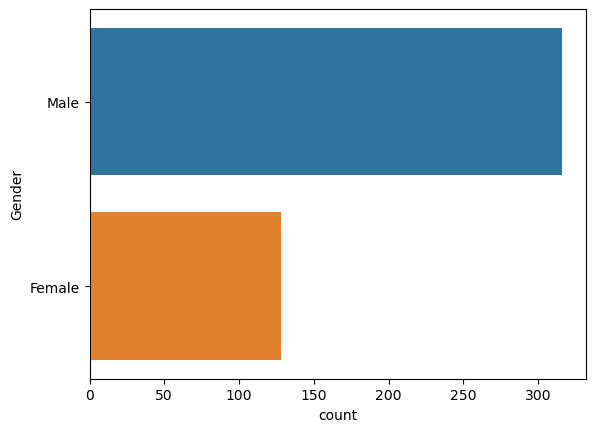

In [11]:
sns.countplot(y="Gender",data=df)



<AxesSubplot:xlabel='count', ylabel='Engineer'>

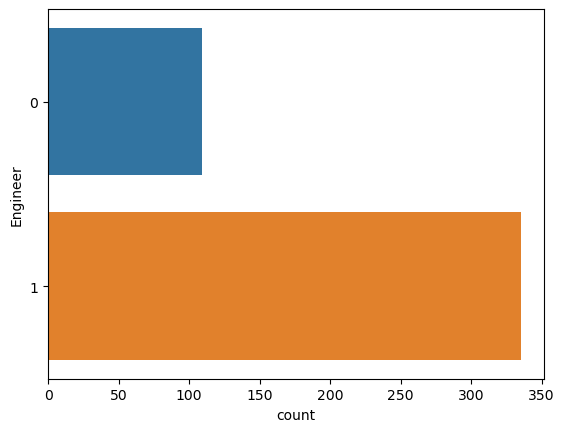

In [12]:
sns.countplot(y="Engineer",data=df)


<AxesSubplot:xlabel='count', ylabel='MBA'>

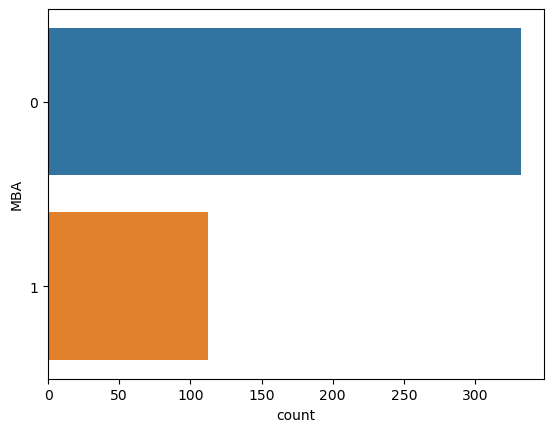

In [13]:
sns.countplot(y="MBA",data=df)


<AxesSubplot:xlabel='count', ylabel='license'>

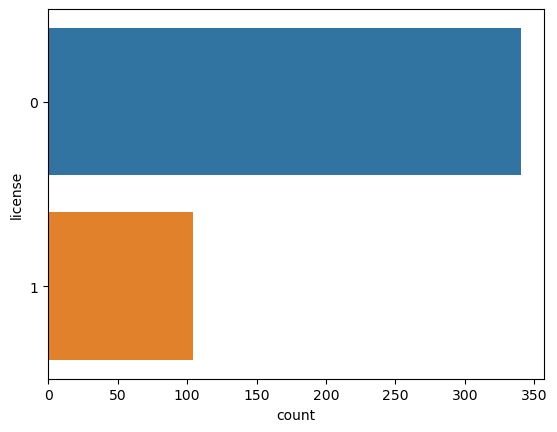

In [14]:
sns.countplot(y="license",data=df)

<AxesSubplot:xlabel='count', ylabel='Transport'>

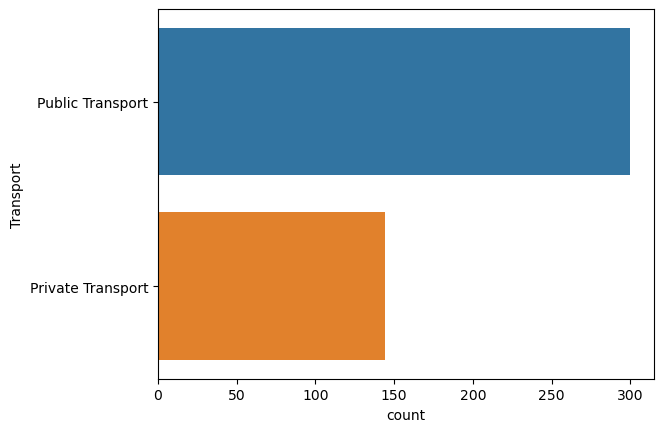

In [15]:
sns.countplot(y="Transport",data=df)

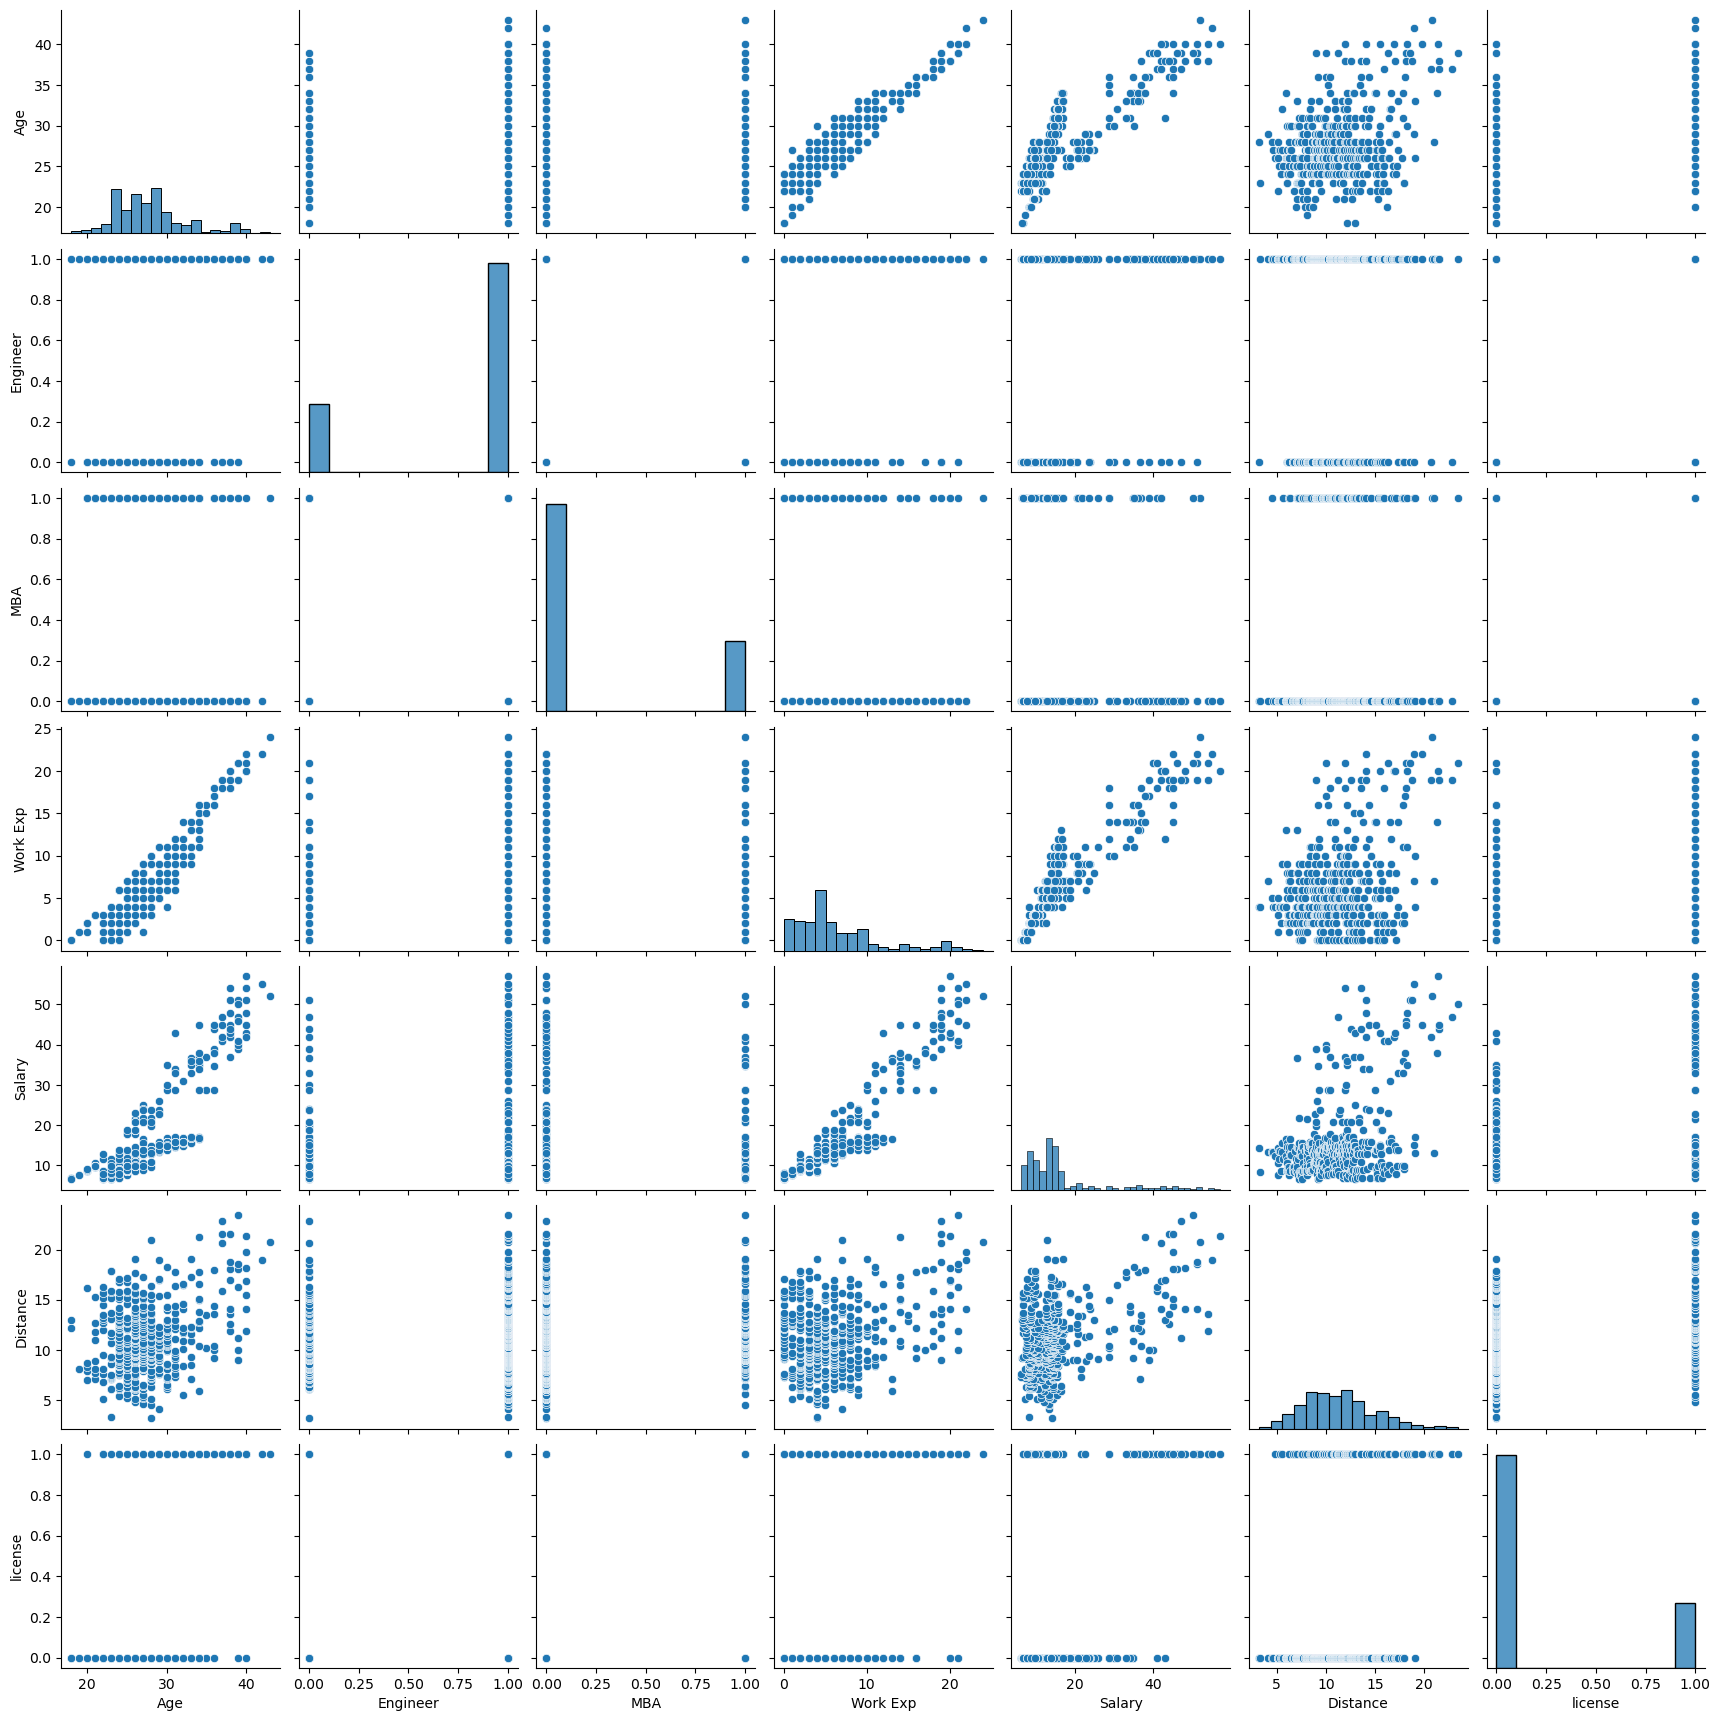

In [16]:
sns.pairplot(df)

<AxesSubplot:>

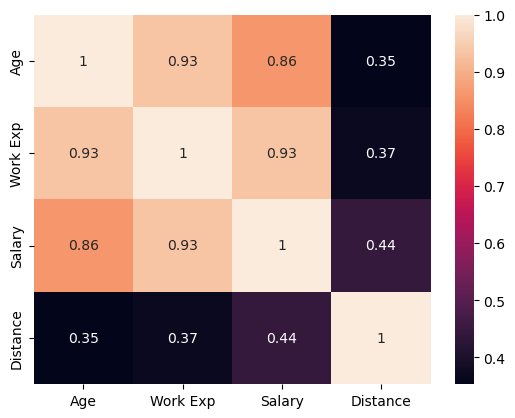

In [17]:
sns.heatmap(df.corr(), annot=True)

In [18]:
df['Transport'] = pd.Categorical(df['Transport']).codes
df.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,1
1,23,Female,1,0,4,8.3,3.3,0,1
2,29,Male,1,0,7,13.4,4.1,0,1
3,28,Female,1,1,5,13.4,4.5,0,1
4,27,Male,1,0,4,13.4,4.6,0,1
5,26,Male,1,0,4,12.3,4.8,1,1
6,28,Male,1,0,5,14.4,5.1,0,0
7,26,Female,1,0,3,10.5,5.1,0,1
8,22,Male,1,0,1,7.5,5.1,0,1
9,27,Male,1,0,4,13.5,5.2,0,1


In [19]:
num1= ['Work Exp', 'Distance','Age','Salary']
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [20]:
cat=[]
num=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Gender', 'Engineer', 'MBA', 'license']
num =  ['Age', 'Work Exp', 'Salary', 'Distance', 'Transport']


In [21]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

D:\Anaconda\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [25]:
df.head(10)

,Age,Work Exp,Salary,Distance,Transport,Gender_Male,Engineer_1,MBA_1,license_1
0,0.40,0.166667,0.154455,0.000000,1,1,0,0,0
1,0.20,0.166667,0.035644,0.004950,1,0,1,0,0
2,0.44,0.291667,0.136634,0.044554,1,1,1,0,0
3,0.40,0.208333,0.136634,0.064356,1,0,1,1,0
4,0.36,0.166667,0.136634,0.069307,1,1,1,0,0
5,0.32,0.166667,0.114851,0.079208,1,1,1,0,1
6,0.40,0.208333,0.156436,0.094059,0,1,1,0,0
7,0.32,0.125000,0.079208,0.094059,1,0,1,0,0
8,0.16,0.041667,0.019802,0.094059,1,1,1,0,0
9,0.36,0.166667,0.138614,0.099010,1,1,1,0,0


In [23]:
df.dtypes

Age            float64
Work Exp       float64
Salary         float64
Distance       float64
Transport         int8
Gender_Male      uint8
Engineer_1       uint8
MBA_1            uint8
license_1        uint8
dtype: object

In [26]:
# Copy all the predictor variables into X dataframe
X = df.drop('Transport', axis=1)

# Copy target into the y dataframe. 
y = df['Transport']

In [27]:
X.head()

,Age,Work Exp,Salary,Distance,Gender_Male,Engineer_1,MBA_1,license_1
0,0.40,0.166667,0.154455,0.000000,1,0,0,0
1,0.20,0.166667,0.035644,0.004950,0,1,0,0
2,0.44,0.291667,0.136634,0.044554,1,1,0,0
3,0.40,0.208333,0.136634,0.064356,0,1,1,0
4,0.36,0.166667,0.136634,0.069307,1,1,0,0


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Transport, dtype: int8

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [31]:
lr = LogisticRegression(penalty="l2", C=1).fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [32]:
model.score(X_train, y_train)

0.8096774193548387

In [33]:
model.score(X_test, y_test)

0.7611940298507462

In [38]:
pip install lazypredict

     ---------------------------------------- 1.0/1.0 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 89.1/89.1 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [41]:
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:02<00:00, 13.49it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.84,0.78,0.78,0.83,0.35
ExtraTreesClassifier,0.80,0.74,0.74,0.79,0.26
BaggingClassifier,0.79,0.74,0.74,0.79,0.07
ExtraTreeClassifier,0.78,0.74,0.74,0.78,0.03
LGBMClassifier,0.81,0.73,0.73,0.79,0.12
LabelPropagation,0.78,0.72,0.72,0.77,0.03
XGBClassifier,0.78,0.72,0.72,0.77,0.18
LabelSpreading,0.77,0.71,0.71,0.76,0.04
SVC,0.79,0.69,0.69,0.76,0.05


In [42]:
#The END, Thanks for your attention